In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<p style="text-align:center">
    <font size="8" style="color:darkred">
        <div style="text-align:center">
        Crecimiento Económico Real
        </div>
    </font>

<p style="text-align:center">
    <font size="6" style="color:darkred">
        <div style="text-align:center">
        Obtención de datos
        </div>
    </font>

In [2]:
data = pd.read_csv('../data/PIB.csv', index_col='Periodos', parse_dates=['Periodos'], infer_datetime_format=True)
data

,PIB,PIB VA,PIB VT
Periodos,,,
1981-03-30,8.155986e+06,9.067071,3.064674
1981-06-30,8.377923e+06,11.688515,2.721163
1981-09-30,8.423516e+06,9.713964,0.544203
1981-12-31,8.519346e+06,7.656344,1.137643
1982-03-30,8.433913e+06,3.407652,-1.002806
...,...,...,...
2021-03-30,1.772292e+07,-2.787609,0.764387
2021-06-30,1.790774e+07,19.569450,1.042864
2021-09-30,1.778268e+07,4.619192,-0.698398


Los datos antes mostrados fueron tomados del Banco de Información Económica (<a href="https://www.inegi.org.mx/app/indicadores/?tm=0#bodydataExplorer">BIE</a>) perteneciente al INEGI. Se tomó la serie desestacionalizada y a precios constantes de 2013 del PIB, también, se seleccionó la tasa anual y trimestral de dicha serie.

Para cálcular el cambio porcentual de una serie de tiempo ($ Y_{t} $) ante $ k $ rezagos, se tiene la siguiente fórmula:

$
\begin{equation}
    \Delta \% Y_{t} = \frac{Y_{t}}{Y_{t-k}} - 1
\end{equation}
$

El cálculo del crecimiento económico es exactamente igual a la inflación, entonces, no se dará profundidad a la metodología. <br>
Para el caso de la inflación se utilizó un rezago para la tasa mensual y doce rezagos para la tasa anual, para el caso del crecimiento económico se ocupa un rezago para la tasa trimestral y cuatro rezagos para la tasa anual. La cantidad de rezagos depende de la periodicidad de la información y recuerde que se pierde una cantidad $k$ de la información.

Aquí se tiene un problema de información, aún no se publica la información del PIB para el primer trimestre de 2022 y se tiene un valor NaN, entonces, al calcular la tasa de crecimiento anual debería retornar un valor NaN para el primer trimestre pero no es así, retorna un valor que puede ser confundido con una tasa de crecimiento, esto se debe al argumento de fill_method que ordena verificar la existencia de NaN y sustituirlos con el valor más cercano, por lo tanto, se debe quitar dicho argumento con un None.

In [3]:
data.PIB.pct_change(4)

Periodos
1981-03-30         NaN
1981-06-30         NaN
1981-09-30         NaN
1981-12-31         NaN
1982-03-30    0.034077
                ...   
2021-03-30   -0.027876
2021-06-30    0.195694
2021-09-30    0.046192
2021-12-31    0.011250
2022-03-30    0.003579
Name: PIB, Length: 165, dtype: float64

In [4]:
data.PIB.pct_change(4, fill_method=None)

Periodos
1981-03-30         NaN
1981-06-30         NaN
1981-09-30         NaN
1981-12-31         NaN
1982-03-30    0.034077
                ...   
2021-03-30   -0.027876
2021-06-30    0.195694
2021-09-30    0.046192
2021-12-31    0.011250
2022-03-30         NaN
Name: PIB, Length: 165, dtype: float64

<p style="text-align:center">
    <font size="6" style="color:darkred">
        <div style="text-align:center">
        Cálculo de la variación anual y trimestral del PIB
        </div>
    </font>

In [5]:
data_crecimiento_economico = pd.DataFrame(index=data.index)
data_crecimiento_economico['Interanual'] = data['PIB'].pct_change(4, fill_method=None)*100
data_crecimiento_economico['Trimestral'] = data['PIB'].pct_change(fill_method=None)*100
data_crecimiento_economico = data_crecimiento_economico.dropna()
data_crecimiento_economico

,Interanual,Trimestral
Periodos,,
1982-03-30,3.407652,-1.002806
1982-06-30,0.784653,0.115578
1982-09-30,-0.274278,-0.512201
1982-12-31,-3.702723,-2.339343
1983-03-30,-4.320506,-1.637911
...,...,...
2020-12-31,-4.406055,3.476657
2021-03-30,-2.787609,0.764387
2021-06-30,19.569450,1.042864


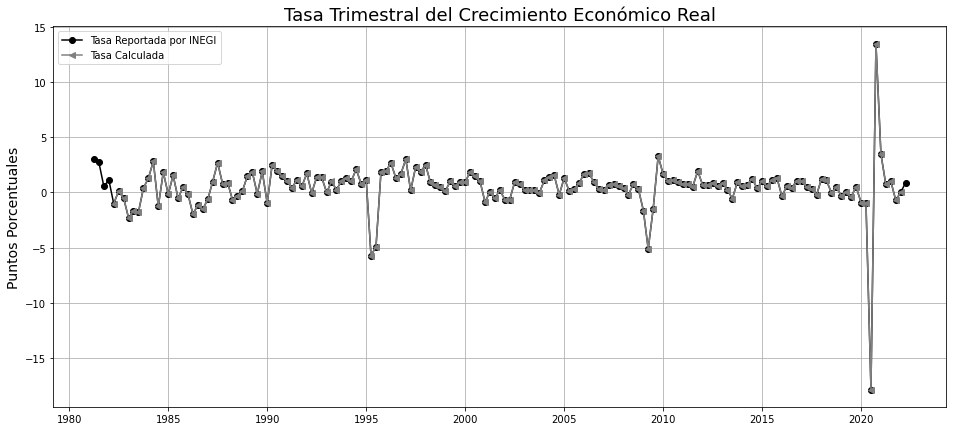

In [6]:
plt.figure(figsize=[16,7]) # Determina el tamaño del gráfico

plt.plot(data['PIB VT'], label='Tasa Reportada por INEGI', color='black', marker='o')
plt.plot(data_crecimiento_economico.Trimestral, label='Tasa Calculada', color='gray', marker='<')

plt.title('Tasa Trimestral del Crecimiento Económico Real', size=18)
plt.ylabel('Puntos Porcentuales', size=14)
plt.legend() # Muestra la leyenda de las series
plt.grid() # Muestra la cuadrícula

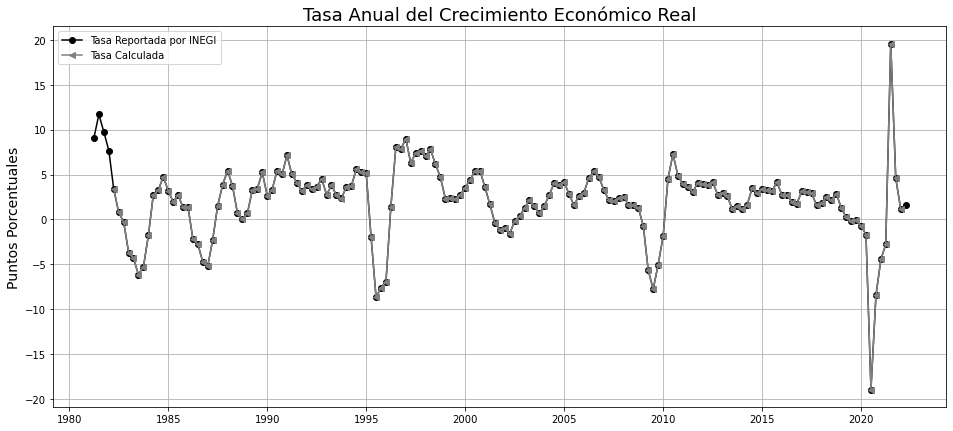

In [7]:
plt.figure(figsize=[16,7]) # Determina el tamaño del gráfico

plt.plot(data['PIB VA'], label='Tasa Reportada por INEGI', color='black', marker='o')
plt.plot(data_crecimiento_economico['Interanual'], label='Tasa Calculada', color='gray', marker='<')

plt.title('Tasa Anual del Crecimiento Económico Real', size=18)
plt.ylabel('Puntos Porcentuales', size=14)
plt.legend() # Muestra la leyenda de las series
plt.grid() # Muestra la cuadrícula

Los datos antes mostrados se pueden observar en el apartado *"Producto Interno Bruto Trimestral, cifras desestacionalizadas"* del portal de INEGI en el siguiente <a href="https://www.inegi.org.mx/temas/pib/">enlace</a>. <br>
Es imperativo decir que los últimos valores pueden variar por que se toman los valores preliminares reportados por INEGI. Para tener un dato certero de la variación anual y trimestral se deberá esperar a que se publique la información revisada.